### To Do List

- base time on solar time noon
- *organize python modules and virtual environments*
- introduce git in the module tree
- static ip address

- python -m pip install --upgrade pip
- pyephem
- pandas
- jupyter
- requests
- geopy
- matplotlib


In [1]:
from datetime import date, time, datetime, timedelta
import pandas as pd
import enphase as e
import matplotlib.pyplot as pyplot
import numpy as np
import pprint

In [2]:
e.print_environ()
pp = pprint.PrettyPrinter(indent=4)
not_long_ago = e.today() - timedelta(days=14)

ENPHASE_API_VERSION: v2
ENPHASE_SYSTEM_ID: 1779982
ENPHASE_APP_USER_ID: 4d546b304d5455794d513d3d0a
ENPHASE_APP_KEY: 371f77b1f3836684576fadc9080d9dad
ENPHASE_STATS_PATH: /Users/electronhead/dev/data/enphase/


In [3]:
data = e.compute_data_frame(complete_days=False, start_date=e.yesterday())
e.augment_data_frame(data)
data_copy = data.copy()
data15 = e.compute_data_frame(complete_days=False, increment=15)
data60 = e.compute_data_frame(complete_days=False, increment=60)

/Users/electronhead/dev/data/enphase/stats_2021-02-02.csv
SUCCESS: 117 rows written to  /Users/electronhead/dev/data/enphase/stats_2021-02-02.csv
/Users/electronhead/dev/data/enphase/stats_2021-02-03.csv
SUCCESS: 117 rows written to  /Users/electronhead/dev/data/enphase/stats_2021-02-03.csv
{'dates_processed': 2, 'last_date_processed': datetime.date(2021, 2, 3)}
{'dates_processed': 0, 'last_date_processed': None}
{'dates_processed': 0, 'last_date_processed': None}


In [4]:
def slap(arg):
    print_glee = lambda glee: print(glee, '\n')
    if flea == 0: # PIVOT FORWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.f, start_date=not_long_ago, stop_date=e.today(), start_time=time(9,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 1: # PIVOT BACKWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.b, start_date=not_long_ago, stop_date=e.today(), start_time=time(9,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 2: # STATS
        glee = e.stats_by_time(data, column=e.wh, start_date=e.online_date(), stop_date=e.today())
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 3: # SUM BY TIME AND PLOT
        glee = data[[e.d,e.wh]].groupby([e.d]).sum()
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 4: # SUM RECENT WATT HOURS
        wh = e.by_date(data[[e.d,e.wh]], e.bom(), e.today())
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 5: # PLOT YESTERDAY'S WATT HOURS
        glee = e.by_date(data, e.yesterday(), e.yesterday())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 6: # PLOT TODAY'S WATT HOURS
        glee = e.by_date(data, e.today(), e.today())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 7: # YESTERDAY'S RAW STATS
        pp.pprint(e.request_stats(e.yesterday()).json())
    elif flea == 8: # TODAY'S RAW STATS
        pp.pprint(e.request_stats(e.today()).json())
    elif flea == 9: # SUM OF PGE WATT HOURS FOR LAST TIME PERIOD
        glee = e.by_date(data,date(2020,12,25),date(2021,1,27))[e.wh].sum()
        print(glee/1000, 'kWh\n')

+++++++++++++++++
flea: 9
+++++++++++++++++
156.764 kWh

+++++++++++++++++
flea: 4
+++++++++++++++++
            watt_hours
date                  
2021-02-01        2464
2021-02-02        7967
2021-02-03        9253 

len         3
sum     19684
amin     2464
mean     6561
amax     9253
Name: watt_hours, dtype: int64 

+++++++++++++++++
flea: 0
+++++++++++++++++
time        08:00:00-08:00  09:00:00-08:00  10:00:00-08:00  11:00:00-08:00  \
date                                                                         
2021-01-20             3.0           254.0           902.0          1721.0   
2021-01-21             0.0           107.0           525.0          1161.0   
2021-01-22             0.0            44.0           442.0          1127.0   
2021-01-23             6.0           156.0           649.0          1415.0   
2021-01-24             0.0           108.0           410.0           934.0   
2021-01-25             0.0            91.0           671.0          1686.0   
2021-01-26 

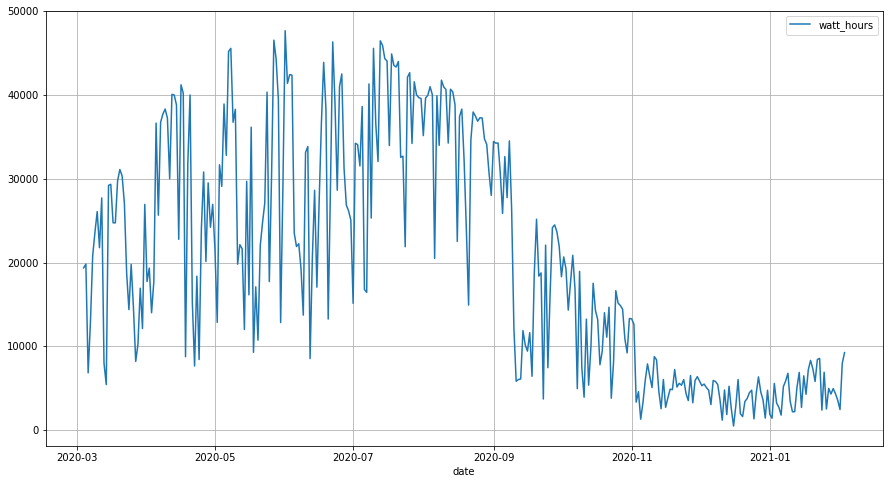

In [5]:
for flea in [9,4,0,1,3]:
    print('+++++++++++++++++')
    print('flea:', flea)
    print('+++++++++++++++++')
    slap(flea)

<AxesSubplot:xlabel='time'>

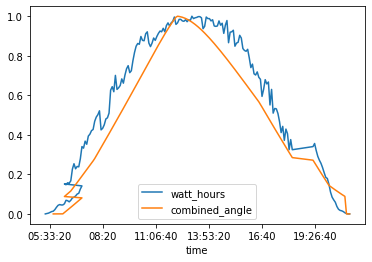

In [6]:
col = e.combined
angle_date = date(2020,6,21)
kwh = e.by_date(data, e.online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

<AxesSubplot:xlabel='time'>

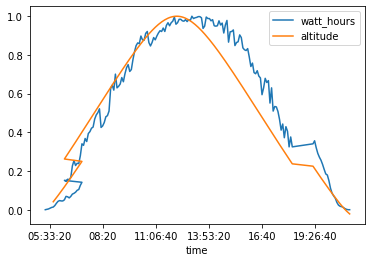

In [7]:
col = e.alt
angle_date = date(2020,6,21)
kwh = e.by_date(data, e.online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

<AxesSubplot:xlabel='time'>

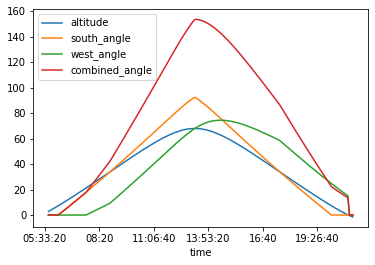

In [8]:
angle_date = date(2020,6,21)
angles = e.by_date(data, angle_date, angle_date)
angles[[e.t, e.alt, e.south, e.west, e.combined]].plot(x=e.t)

In [9]:
wh = pd.DataFrame(data.groupby(e.t)[e.wh].max(), columns=[e.wh])
angles = pd.DataFrame(e.by_date(data, date(2020,6,21), date(2020,6,21)).groupby(e.t)[e.combined].max(), columns=[e.combined])
joined = wh.join(angles, on=e.t)
joined.assign(factor=lambda x: x[e.wh] / x[e.combined])
print(wh)
print(angles)
print(joined.head(60))

                watt_hours
time                      
05:20:00-07:00           0
05:25:00-07:00           1
05:30:00-07:00           2
05:35:00-07:00           4
05:40:00-07:00           6
...                    ...
20:55:00-07:00           6
21:00:00-07:00           3
21:05:00-07:00           1
21:10:00-07:00           0
21:15:00-07:00           0

[192 rows x 1 columns]
                combined_angle
time                          
05:45:00-07:00        0.000000
05:50:00-07:00        0.000000
05:55:00-07:00        0.000000
06:00:00-07:00        0.000000
06:05:00-07:00        0.000000
...                        ...
20:55:00-07:00       14.414582
21:00:00-07:00       13.639740
21:05:00-07:00        0.000000
21:10:00-07:00        0.000000
21:15:00-07:00        0.000000

[187 rows x 1 columns]
                watt_hours  combined_angle
time                                      
05:20:00-07:00           0             NaN
05:25:00-07:00           1             NaN
05:30:00-07:00           2

In [10]:
angle_date = date(2020,6,21)
angles_sum = e.by_date(data, angle_date, angle_date)[[e.combined]].sum()
print(angles_sum)

combined_angle    14151.464813
dtype: float64


In [11]:
data.groupby(e.t)[e.wh].max().sum()

54707

In [12]:
data

,date,time,date_time,watts,watt_hours,forward,backward,peak,altitude,azimuth,south_angle,west_angle,combined_angle
0,2020-03-04,06:20:00-08:00,2020-03-04 06:20:00-08:00,1,0,0,19355,0,-15.221715,83.163769,0.000000,0.000000,0.000000
1,2020-03-04,06:25:00-08:00,2020-03-04 06:25:00-08:00,1,0,0,19355,0,-14.349959,84.080237,0.000000,0.000000,0.000000
2,2020-03-04,06:30:00-08:00,2020-03-04 06:30:00-08:00,1,0,0,19355,0,-13.476764,84.991684,0.000000,0.000000,0.000000
3,2020-03-04,06:35:00-08:00,2020-03-04 06:35:00-08:00,1,0,0,19355,0,-12.602355,85.898576,0.000000,0.000000,0.000000
4,2020-03-04,06:40:00-08:00,2020-03-04 06:40:00-08:00,1,0,0,19355,0,-11.726956,86.801391,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49767,2021-02-03,17:10:00-08:00,2021-02-03 17:10:00-08:00,49,4,9249,8,0,10.044613,234.311880,19.809009,24.904535,42.223090
49768,2021-02-03,17:15:00-08:00,2021-02-03 17:15:00-08:00,33,3,9252,4,0,9.335776,235.289498,18.832692,24.463178,40.849552
49769,2021-02-03,17:20:00-08:00,2021-02-03 17:20:00-08:00,15,1,9253,1,0,8.619443,236.258702,17.851182,24.012023,39.462003
49770,2021-02-03,17:25:00-08:00,2021-02-03 17:25:00-08:00,0,0,9253,0,0,7.896130,237.219765,16.864918,23.551660,38.061412
